# NBA Archetypes

## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score, f1_score
from sklearn.manifold import TSNE
from xgboost import XGBClassifier

## Load Data

In [2]:
# Load data function
def load_data(file_name, local_path, server_path, encoding='utf-8', sep=','):
    try:
        data = pd.read_csv(local_path + file_name, encoding=encoding, sep=';')
        print(f"'{file_name}' file successfully read from the local path.")

    except (FileNotFoundError, UnicodeDecodeError):
        try:
            data = pd.read_csv(server_path + file_name, encoding=encoding, sep=';')
            print(f"'{file_name}' file successfully read from the server path.")

        except FileNotFoundError:
            print(f"'{file_name}' file not found. Please check the file paths.")
            data = None

        except UnicodeDecodeError:
            print(f"Encoding error encountered while reading '{file_name}' from the server path.")
            data = None
            
    return data

file_name = '2023-2024 NBA Player Stats - Regular.csv'
local_path = '/Users/benjaminstephen/Documents/TripleTen/Code_Pudding/NBA-Archetypes/datasets/'
server_path = '/datasets/'

df = load_data(file_name, local_path, server_path, encoding='ISO-8859-1', sep=';')

'2023-2024 NBA Player Stats - Regular.csv' file successfully read from the local path.


## Data Preprocessing

In [3]:
# Analyze function
def analyze(data):
    # Display the DataFrame
    display(data)

    # Print DataFrame Info
    print("DATAFRAME INFO:")
    data.info()
    print()

    # Calculate Percentage of Null Values
    print("PERCENTAGE OF NULL VALUES:")
    print((data.isnull().sum()/len(data)) * 100)
    print()

    # Calculate Number of Duplicated Rows
    print("NUMBER OF DUPLICATED ROWS:", data.duplicated().sum())

In [4]:
analyze(df)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,0.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null   

In [5]:
# Define the mapping of current column names to full names
column_mapping = {
    'Rk': 'Rank',
    'Player': 'Player Name',
    'Pos': 'Position',
    'Age': 'Age',
    'Tm': 'Team',
    'G': 'Games Played',
    'GS': 'Games Started',
    'MP': 'Minutes Per Game',
    'FG': 'Field Goals Made',
    'FGA': 'Field Goals Attempted',
    'FG%': 'Field Goal Percentage',
    '3P': 'Three-Point Field Goals Made',
    '3PA': 'Three-Point Field Goals Attempted',
    '3P%': 'Three-Point Field Goal Percentage',
    '2P': 'Two-Point Field Goals Made',
    '2PA': 'Two-Point Field Goals Attempted',
    '2P%': 'Two-Point Field Goal Percentage',
    'eFG%': 'Effective Field Goal Percentage',
    'FT': 'Free Throws Made',
    'FTA': 'Free Throws Attempted',
    'FT%': 'Free Throw Percentage',
    'ORB': 'Offensive Rebounds',
    'DRB': 'Defensive Rebounds',
    'TRB': 'Total Rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers',
    'PF': 'Personal Fouls',
    'PTS': 'Points'
}

# Rename the columns using the mapping
df.rename(columns=column_mapping, inplace=True)

In [6]:
df = df.drop(columns=['Age', 
                      'Rank', 
                      'Position', 
                      'Team',
                      'Games Played',
                      'Games Started',
                      'Field Goal Percentage',
                      'Three-Point Field Goal Percentage', 
                      'Two-Point Field Goal Percentage', 
                      'Effective Field Goal Percentage',
                      'Free Throw Percentage', 
                      'Total Rebounds'
                      ])

1) Rank ('Rk'): This is just an identifier of player rank and does not represent a player's performance, so it does not contribute to clustering.
2) Player Name ('Player'): This is also an identifier, not a numeric or performance-related feature.
3) Age ('Age'): While age can influence a player's style, it may not directly contribute to player archetypes like playing style or efficiency. If you want to account for experience or prime age, you could consider including it.
4) Team ('Tm'): Teams influence player performance but may not help identify archetypes unless you want to include team-based playing styles. You can drop this feature unless team context is crucial for the clustering.
5) Games Played ('G'): If the dataset already has a substantial number of games for each player, this might be redundant, as you may already have performance metrics (e.g., minutes played, points) that reflect their impact on the court.
6) Games Started ('GS'): Similar to 'Games Played,' this feature may not add unique information when compared to other features like 'Minutes Per Game' or 'Points'.
7) Field Goal Percentage ('FG%') and Effective Field Goal Percentage ('eFG%'): If you're using other shooting stats like 'Field Goals Made', '3P%', and '2P%', you might not need these, as they can be highly correlated.

In [7]:
aggregated_df = df.groupby('Player Name').agg({
    #'Age': 'first',  # Use the first occurrence of age, assuming age doesn’t change within a season
    #'Games Played': 'sum',  # Total games played
    #'Games Started': 'sum',  # Total games started
    'Minutes Per Game': 'sum',  # Total minutes played
    'Field Goals Made': 'sum',  # Total field goals made
    'Field Goals Attempted': 'sum',  # Total field goals attempted
    #'Field Goal Percentage': 'mean',
    'Three-Point Field Goals Made': 'sum',  # Total three-pointers made
    'Three-Point Field Goals Attempted': 'sum',  # Total three-point attempts
    #'Three-Point Field Goal Percentage': 'mean',
    'Two-Point Field Goals Made': 'sum',  # Total two-pointers made
    'Two-Point Field Goals Attempted': 'sum',  # Total two-point attempts
    #'Two-Point Field Goal Percentage': 'mean',
    #'Effective Field Goal Percentage': 'mean',
    'Free Throws Made': 'sum',  # Total free throws made
    'Free Throws Attempted': 'sum',  # Total free throw attempts
    #'Free Throw Percentage': 'mean',
    'Offensive Rebounds': 'sum',  # Total offensive rebounds
    'Defensive Rebounds': 'sum',  # Total defensive rebounds
    #'Total Rebounds': 'sum',  # Total rebounds
    'Assists': 'sum',  # Total assists
    'Steals': 'sum',  # Total steals
    'Blocks': 'sum',  # Total blocks
    'Turnovers': 'sum',  # Total turnovers
    'Personal Fouls': 'sum',  # Total personal fouls
    'Points': 'sum'   # Total points scored
}).reset_index()

# Verify the aggregated data
analyze(aggregated_df)

,Player Name,Minutes Per Game,Field Goals Made,Field Goals Attempted,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,A.J. Green,11.0,1.5,3.5,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9,4.5
1,A.J. Lawson,7.4,1.3,2.9,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5,3.2
2,AJ Griffin,8.6,0.9,3.1,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3,2.4
3,Aaron Gordon,31.5,5.5,9.8,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9,13.9
4,Aaron Holiday,16.3,2.4,5.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Zach LaVine,34.9,6.8,15.0,2.4,6.8,4.4,8.3,3.5,4.1,0.3,4.8,3.9,0.8,0.3,2.1,2.3,19.5
568,Zavier Simpson,23.0,2.4,7.7,0.7,2.4,1.7,5.3,0.4,0.6,0.6,2.3,3.6,1.0,0.4,1.4,1.6,6.0
569,Zeke Nnaji,9.9,1.2,2.6,0.1,0.4,1.1,2.2,0.7,1.1,1.1,1.1,0.6,0.3,0.7,0.5,1.4,3.2
570,Ziaire Williams,20.4,2.9,7.4,1.1,3.7,1.8,3.7,1.2,1.5,0.7,2.8,1.5,0.7,0.2,1.3,1.7,8.2


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Player Name                        572 non-null    object 
 1   Minutes Per Game                   572 non-null    float64
 2   Field Goals Made                   572 non-null    float64
 3   Field Goals Attempted              572 non-null    float64
 4   Three-Point Field Goals Made       572 non-null    float64
 5   Three-Point Field Goals Attempted  572 non-null    float64
 6   Two-Point Field Goals Made         572 non-null    float64
 7   Two-Point Field Goals Attempted    572 non-null    float64
 8   Free Throws Made                   572 non-null    float64
 9   Free Throws Attempted              572 non-null    float64
 10  Offensive Rebounds                 572 non-null    float64
 11  Defensive Rebounds                 572 non

In [8]:
display(aggregated_df.head(30))

,Player Name,Minutes Per Game,Field Goals Made,Field Goals Attempted,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,A.J. Green,11.0,1.5,3.5,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9,4.5
1,A.J. Lawson,7.4,1.3,2.9,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5,3.2
2,AJ Griffin,8.6,0.9,3.1,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3,2.4
3,Aaron Gordon,31.5,5.5,9.8,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9,13.9
4,Aaron Holiday,16.3,2.4,5.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6,6.6
5,Aaron Nesmith,27.7,4.4,8.8,1.9,4.6,2.4,4.2,1.5,1.9,0.9,2.9,1.5,0.9,0.7,0.9,3.3,12.2
6,Aaron Wiggins,15.7,2.7,4.8,0.8,1.6,1.9,3.2,0.7,0.9,0.8,1.6,1.1,0.7,0.2,0.7,1.2,6.9
7,Adam Flagler,7.0,0.5,3.5,0.5,3.0,0.0,0.5,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.5
8,Adama Sanogo,7.3,1.6,3.0,0.0,0.0,1.6,3.0,0.9,1.3,2.1,1.9,0.0,0.1,0.0,0.6,0.6,4.0
9,Admiral Schofield,3.7,0.4,1.1,0.3,0.7,0.2,0.4,0.0,0.1,0.1,0.6,0.3,0.0,0.0,0.2,0.4,1.1


### Code

In [9]:
names = aggregated_df['Player Name']
aggregated_df = aggregated_df.drop(columns='Player Name')

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(aggregated_df), columns=aggregated_df.columns)
analyze(scaled_df)

,Minutes Per Game,Field Goals Made,Field Goals Attempted,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,-0.727031,-0.692050,-0.675057,0.025738,-0.096986,-0.907028,-0.947907,-0.709525,-0.780193,-0.817492,-0.832698,-0.770539,-0.858246,-0.710275,-0.938550,-0.702656,-0.633936
1,-0.936926,-0.751711,-0.760259,-0.702292,-0.645351,-0.636910,-0.691415,-0.650621,-0.685009,-0.722024,-0.872091,-0.770539,-0.858246,-0.710275,-0.845893,-0.991859,-0.775820
2,-0.866961,-0.871033,-0.731858,-0.540508,-0.401634,-0.868440,-0.798286,-0.827333,-0.875377,-0.912961,-0.911485,-0.848163,-1.012963,-0.710275,-0.753237,-1.136460,-0.863133
3,0.468208,0.501175,0.219557,-0.540508,-0.432098,0.868035,0.633794,0.527458,0.837936,1.282819,0.388492,0.393819,0.070055,0.192564,0.173326,0.020350,0.391993
4,-0.418018,-0.423574,-0.419453,-0.055154,-0.157916,-0.521145,-0.499046,-0.473909,-0.542233,-0.722024,-0.714519,-0.265984,-0.394095,-0.710275,-0.475268,-0.196552,-0.404739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.666443,0.888973,0.957969,0.996446,1.060673,0.675094,0.719291,1.175402,1.028304,-0.722024,0.664244,0.549067,0.070055,-0.349140,0.821919,0.309553,1.003185
568,-0.027379,-0.423574,-0.078647,-0.378723,-0.279775,-0.366792,0.078061,-0.650621,-0.637417,-0.435618,-0.320586,0.432631,0.379489,-0.168572,0.173326,-0.196552,-0.470224
569,-0.791165,-0.781542,-0.802859,-0.864077,-0.889069,-0.598322,-0.584543,-0.473909,-0.399457,0.041726,-0.793305,-0.731727,-0.703529,0.373131,-0.660581,-0.341153,-0.775820
570,-0.178970,-0.274421,-0.121248,-0.055154,0.116267,-0.328203,-0.263928,-0.179389,-0.209089,-0.340149,-0.123620,-0.382420,-0.084662,-0.529708,0.080669,-0.124251,-0.230113


DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minutes Per Game                   572 non-null    float64
 1   Field Goals Made                   572 non-null    float64
 2   Field Goals Attempted              572 non-null    float64
 3   Three-Point Field Goals Made       572 non-null    float64
 4   Three-Point Field Goals Attempted  572 non-null    float64
 5   Two-Point Field Goals Made         572 non-null    float64
 6   Two-Point Field Goals Attempted    572 non-null    float64
 7   Free Throws Made                   572 non-null    float64
 8   Free Throws Attempted              572 non-null    float64
 9   Offensive Rebounds                 572 non-null    float64
 10  Defensive Rebounds                 572 non-null    float64
 11  Assists                            572 non

## PCA

- Original data had 30 features
- Used principal component analysis to reduce that down to 6 components
- Chose 6 because it reatiend 96% of the information but still significantly reduced down dimensions
- Reataining 95% of the information was the goal

For n_components = 2, explained variance ratio is 0.8344413241812415
For n_components = 3, explained variance ratio is 0.9015513672355782
For n_components = 4, explained variance ratio is 0.9287372509907086
For n_components = 5, explained variance ratio is 0.9465118651751296
For n_components = 6, explained variance ratio is 0.9607634711328665
For n_components = 7, explained variance ratio is 0.9740123593077454
For n_components = 8, explained variance ratio is 0.9834013132001419
For n_components = 9, explained variance ratio is 0.9896475736502449
For n_components = 10, explained variance ratio is 0.9951988577939924
For n_components = 11, explained variance ratio is 0.9976691874442842
For n_components = 12, explained variance ratio is 0.9990314852796354
For n_components = 13, explained variance ratio is 0.9996035266926337
For n_components = 14, explained variance ratio is 0.9999850146013308
For n_components = 15, explained variance ratio is 0.9999953145432269
For n_components = 16, expla

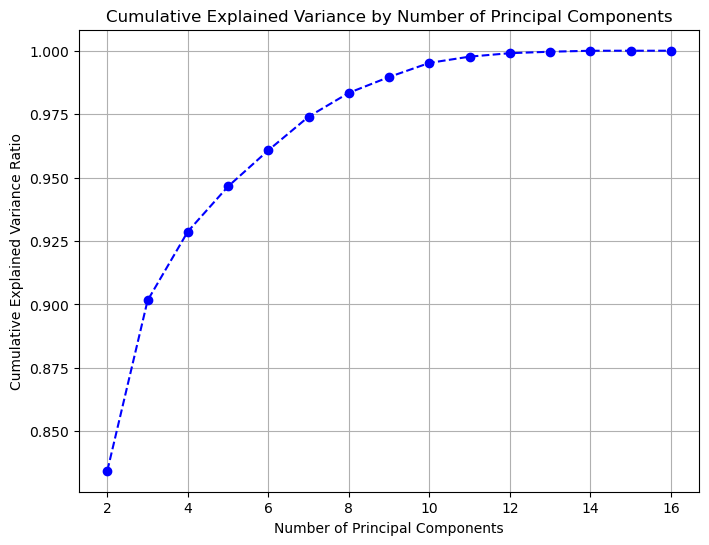

In [10]:
variance_list = []

for n_components in range(2,17):
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(scaled_df)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, variance))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 17), variance_list, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

For n_clusters = 2, silhouette score is 0.504702
For n_clusters = 3, silhouette score is 0.449880
For n_clusters = 4, silhouette score is 0.376876
For n_clusters = 5, silhouette score is 0.347838
For n_clusters = 6, silhouette score is 0.346850
For n_clusters = 7, silhouette score is 0.276038
For n_clusters = 8, silhouette score is 0.309034
For n_clusters = 9, silhouette score is 0.300510
For n_clusters = 10, silhouette score is 0.269279
For n_clusters = 11, silhouette score is 0.263802
For n_clusters = 12, silhouette score is 0.277195
For n_clusters = 13, silhouette score is 0.241020
For n_clusters = 14, silhouette score is 0.215044
For n_clusters = 15, silhouette score is 0.209787


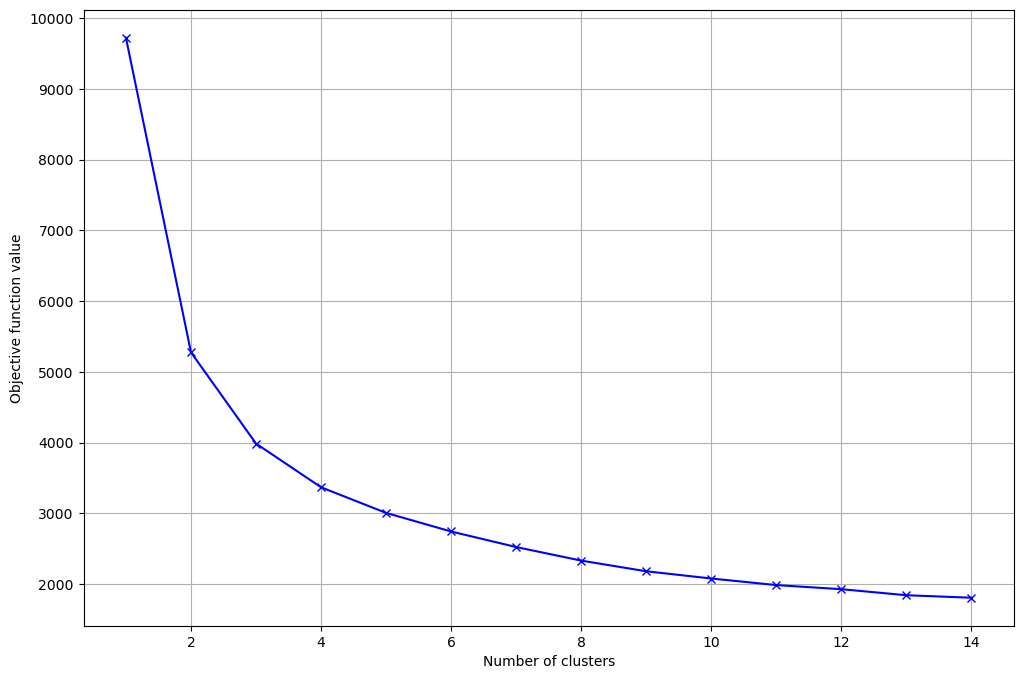

In [11]:
# Perform PCA to reduce data to 6 components
pca_6 = PCA(n_components=6)
components_6 = pca_6.fit_transform(scaled_df)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Range for the number of clusters
K = range(2, 16)  # Start from 2 because silhouette score is undefined for 1 cluster

# Calculate silhouette score for each value of K
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(components_6)
    score = silhouette_score(components_6, model.labels_)
    silhouette_scores.append(score)

    # Output the silhouette score for each k
    print(f"For n_clusters = {k}, silhouette score is {score:.6f}")


distortion = []
K = range(1, 15)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(scaled_df)
    distortion.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Objective function value')
plt.grid(True)
plt.show()


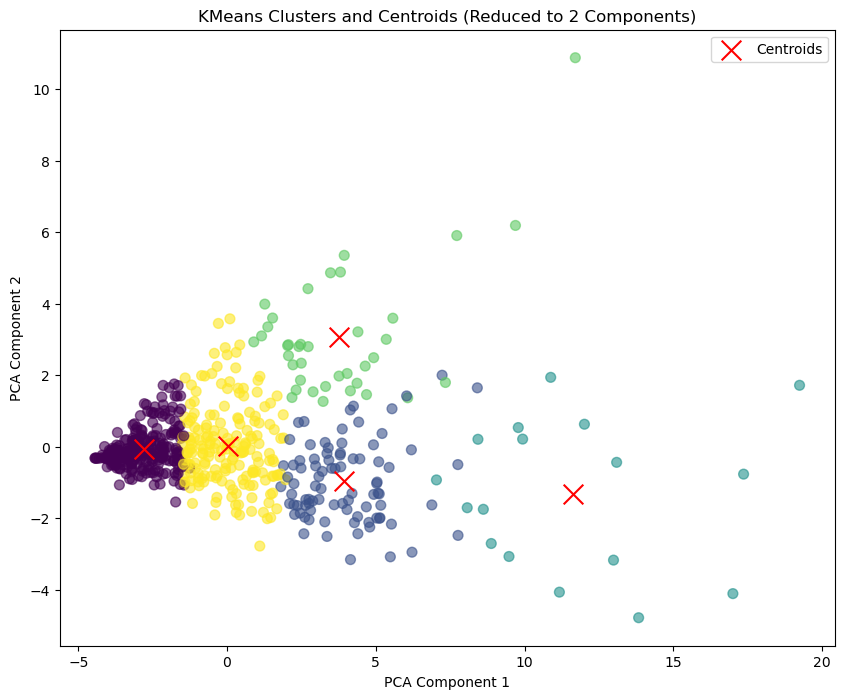

In [12]:
# Perform PCA to reduce the data to 6 components
#pca = PCA(n_components=6)
#scaled_df_pca_6 = pca.fit_transform(scaled_df)

# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=12345)
kmeans.fit(components_6)

# Reduce data to 2 components for visualization
pca_2d = PCA(n_components=2)
scaled_df_pca_2d = pca_2d.fit_transform(components_6)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = pca_2d.transform(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_df_pca_2d[:, 0], scaled_df_pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.6, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters and Centroids (Reduced to 2 Components)')
plt.legend()

# Show the plot
plt.show()

In [13]:
aggregated_df['Player Name'] = names
aggregated_df['Archetype'] = labels

columns = ['Player Name', 'Archetype'] + [col for col in aggregated_df.columns if col not in ['Player Name', 'Archetype']]
aggregated_df = aggregated_df[columns]

# Display the updated DataFrame
display(aggregated_df)

,Player Name,Archetype,Minutes Per Game,Field Goals Made,Field Goals Attempted,Three-Point Field Goals Made,Three-Point Field Goals Attempted,Two-Point Field Goals Made,Two-Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
0,A.J. Green,0,11.0,1.5,3.5,1.2,3.0,0.3,0.5,0.3,0.3,0.2,1.0,0.5,0.2,0.1,0.2,0.9,4.5
1,A.J. Lawson,0,7.4,1.3,2.9,0.3,1.2,1.0,1.7,0.4,0.5,0.3,0.9,0.5,0.2,0.1,0.3,0.5,3.2
2,AJ Griffin,0,8.6,0.9,3.1,0.5,2.0,0.4,1.2,0.1,0.1,0.1,0.8,0.3,0.1,0.1,0.4,0.3,2.4
3,Aaron Gordon,4,31.5,5.5,9.8,0.5,1.9,4.9,7.9,2.4,3.7,2.4,4.1,3.5,0.8,0.6,1.4,1.9,13.9
4,Aaron Holiday,0,16.3,2.4,5.3,1.1,2.8,1.3,2.6,0.7,0.8,0.3,1.3,1.8,0.5,0.1,0.7,1.6,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Zach LaVine,1,34.9,6.8,15.0,2.4,6.8,4.4,8.3,3.5,4.1,0.3,4.8,3.9,0.8,0.3,2.1,2.3,19.5
568,Zavier Simpson,4,23.0,2.4,7.7,0.7,2.4,1.7,5.3,0.4,0.6,0.6,2.3,3.6,1.0,0.4,1.4,1.6,6.0
569,Zeke Nnaji,0,9.9,1.2,2.6,0.1,0.4,1.1,2.2,0.7,1.1,1.1,1.1,0.6,0.3,0.7,0.5,1.4,3.2
570,Ziaire Williams,4,20.4,2.9,7.4,1.1,3.7,1.8,3.7,1.2,1.5,0.7,2.8,1.5,0.7,0.2,1.3,1.7,8.2


0    42.832168
4    32.342657
1    15.209790
3     6.643357
2     2.972028
Name: Archetype, dtype: float64


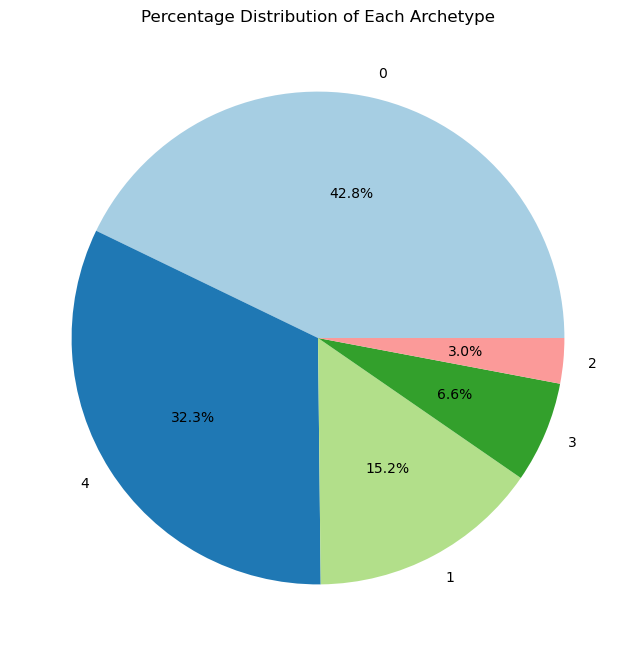

In [14]:
# Calculate the percentage of each archetype
archetype_counts = aggregated_df['Archetype'].value_counts(normalize=True) * 100

# Display the results as percentages
print(archetype_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(archetype_counts, labels=archetype_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Each Archetype')
plt.show()